In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

In [2]:
# Memory reducing functions
def reduceMem(df):
    start_mem=df.memory_usage().sum()/1024**2
    
    for c in df.columns:
        c_type=df[c].dtype
        
        if c_type != object:
            c_min=df[c].min()
            c_max=df[c].max()
            if str(c_type)[:3]=='int':
                if c_min>np.iinfo(np.int8).min and c_max<np.iinfo(np.int8).max:
                    df[c]=df[c].astype(np.int8)
                elif c_min>np.iinfo(np.int16).min and c_max<np.iinfo(np.int16).max:
                    df[c]=df[c].astype(np.int16)
                elif c_min>np.iinfo(np.int32).min and c_max<np.iinfo(np.int32).max:
                    df[c]=df[c].astype(np.int32)
                elif c_min>np.iinfo(np.int64).min and c_max<np.iinfo(np.int64).max:
                    df[c]=df[c].astype(np.int64)
            else:
                if c_min>np.finfo(np.float32).min and c_max<np.finfo(np.float32).max:
                    df[c]=df[c].astype(np.float32)
                else:
                    df[c]=df[c].astype(np.float64)
    end_mem=df.memory_usage().sum()/1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(start_mem,end_mem,100*(start_mem-end_mem)/start_mem))
    return df

In [3]:
# import train and test datasets
train=pd.read_csv('train.csv')
train=reduceMem(train)
test=pd.read_csv('test.csv')
test=reduceMem(test)

Memory usage of dataframe is 0.53 MB --> 0.46 MB (Decreased by 12.0%)
Memory usage of dataframe is 0.74 MB --> 0.66 MB (Decreased by 10.2%)


### EDA ###

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int16
belongs_to_collection    604 non-null object
budget                   3000 non-null int32
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float32
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float32
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int16
belongs_to_collection    877 non-null object
budget                   4398 non-null int32
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float32
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null object
runtime                  4394 non-null float32
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null object
Keywords            

In [6]:
train.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3.000000e+03,...,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,...,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt2304517,en,Black Sheep,This is the story of Spalding Gray and his att...,NaN,...,9/10/10,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Fantastic Four,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '56f61b9bc3a3686a59001f76', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,...,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274e+00,...,NaN,107.856567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,1.210400e+01,...,NaN,22.086433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e-06,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053e+00,...,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861e+00,...,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,1.089098e+01,...,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


In [7]:
test.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
count,4398.000000,877,4.398000e+03,4382,1420,4398,4398,4398,4384,4.398000e+03,...,4296,4397,4394.000000,4356,4396,3535,4395,4005,4385,4376
unique,NaN,556,NaN,1101,1402,4398,39,4353,4383,NaN,...,458,3289,NaN,526,3,3529,4342,3885,4365,4376
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.missionimpossible.com/,tt1414382,en,Great Expectations,No overview found.,NaN,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",9/9/11,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What could go wrong?,Life,"[{'id': 187056, 'name': 'woman director'}]",[],"[{'credit_id': '52fe4514c3a36847f80bb201', 'de..."
freq,NaN,10,NaN,348,3,1,3776,2,2,NaN,...,2587,7,NaN,2704,4389,2,2,30,21,1
mean,5199.500000,NaN,2.264929e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.550229e+00,...,NaN,NaN,107.622215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1269.737571,NaN,3.689991e+07,NaN,NaN,NaN,NaN,NaN,NaN,1.220901e+01,...,NaN,NaN,21.058290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3001.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e-06,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4100.250000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,3.895185e+00,...,NaN,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5199.500000,NaN,7.450000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.482241e+00,...,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6298.750000,NaN,2.800000e+07,NaN,NaN,NaN,NaN,NaN,NaN,1.093852e+01,...,NaN,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\limo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


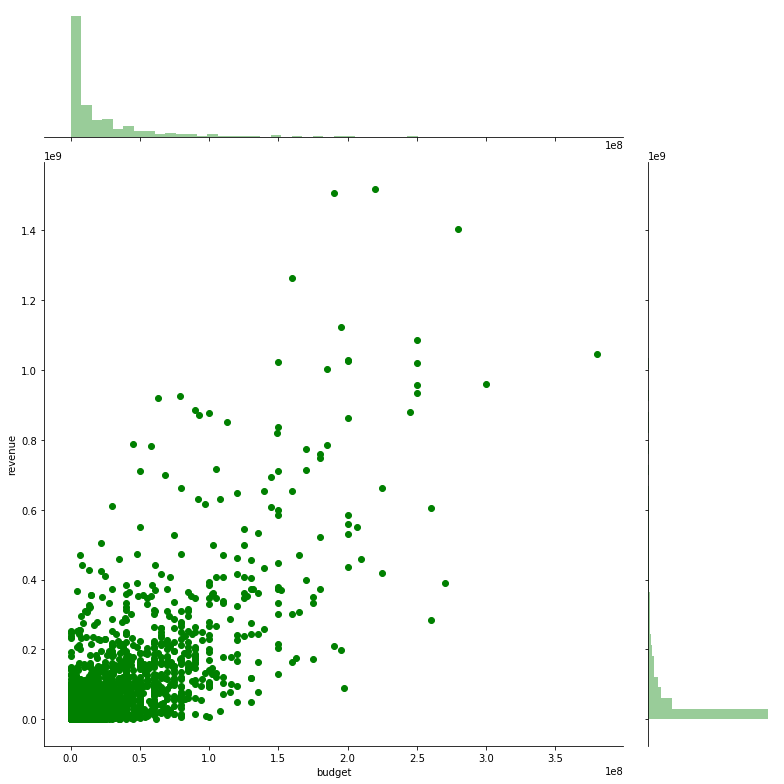

In [8]:
sns.jointplot(data=train,x='budget',y='revenue',color='g',height=11,ratio=4)

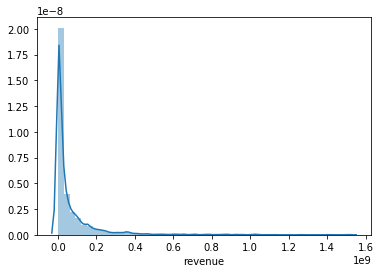

In [9]:
sns.distplot(train.revenue)

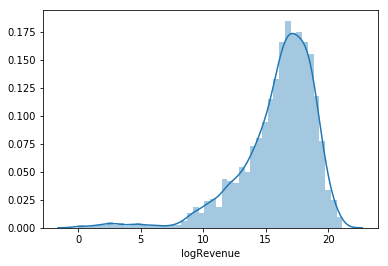

In [10]:
# Because revenue variable is skewed, so calculate the log of it
train['logRevenue']=np.log(train['revenue'])
sns.distplot(train.logRevenue)

In [11]:
train[['release_month','release_day','release_year']]=train['release_date'].str.split('/',expand=True).replace(np.nan,-1).astype('int')

In [12]:
train.loc[(train['release_year']<=19)&(train['release_year']<100),'release_year']+=2000
train.loc[(train['release_year']>19)&(train['release_year']<100),'release_year']+=1900
releaseDate=pd.to_datetime(train['release_date'])
train['release_dayofweek']=releaseDate.dt.dayofweek
train['release_quarter']=releaseDate.dt.quarter

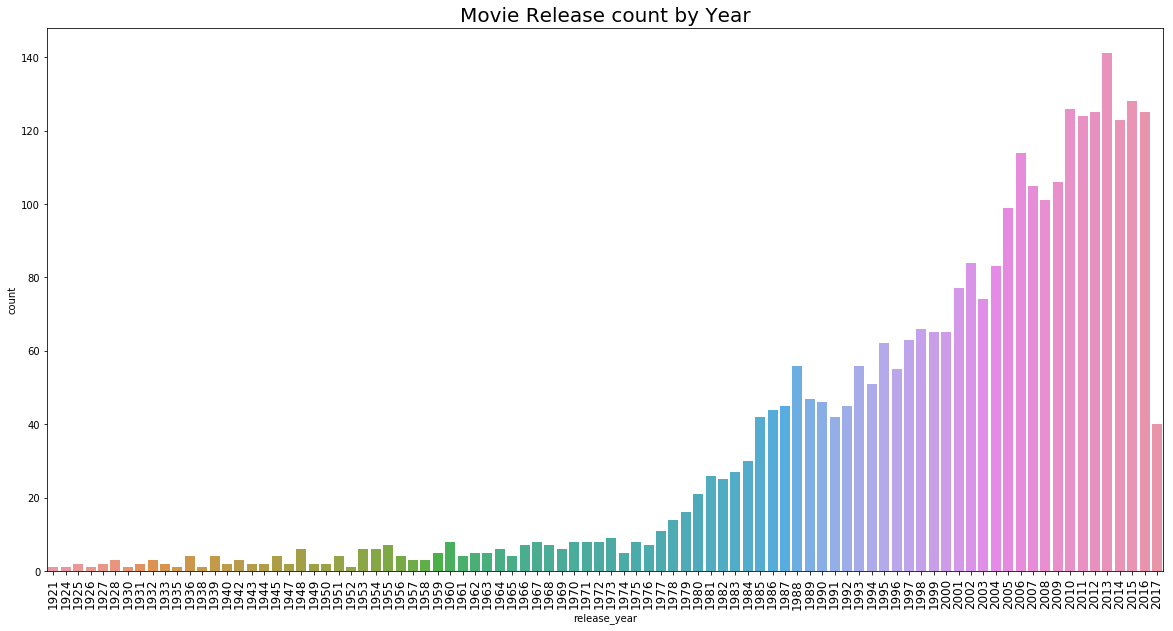

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(train.release_year.sort_values())
plt.title('Movie Release count by Year',fontsize=20)
loc,labels=plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

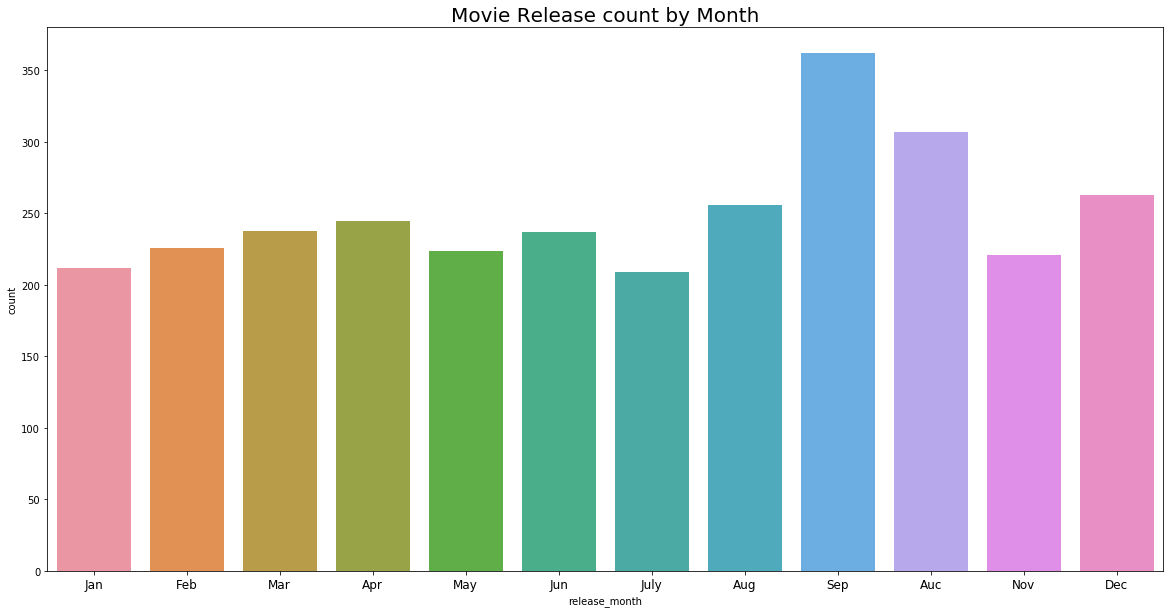

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(train.release_month.sort_values())
plt.title('Movie Release count by Month',fontsize=20)
loc,labels=plt.xticks()
loc,labels=loc,['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Auc','Nov','Dec']
plt.xticks(loc,labels,fontsize=12)
plt.show()

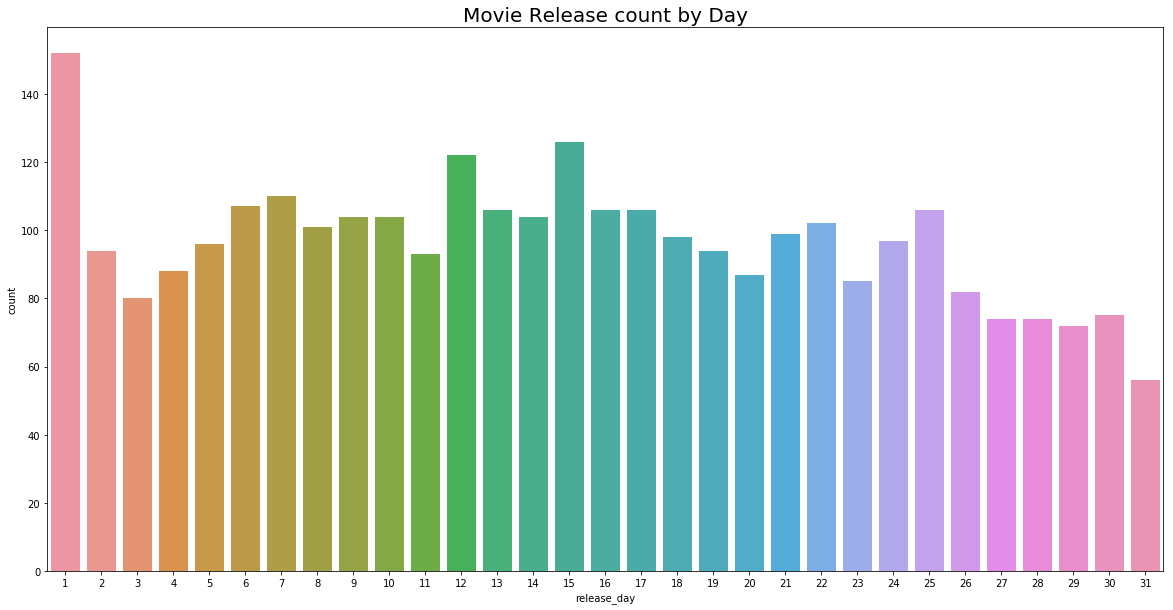

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(train.release_day.sort_values())
plt.title('Movie Release count by Day',fontsize=20)
plt.show()

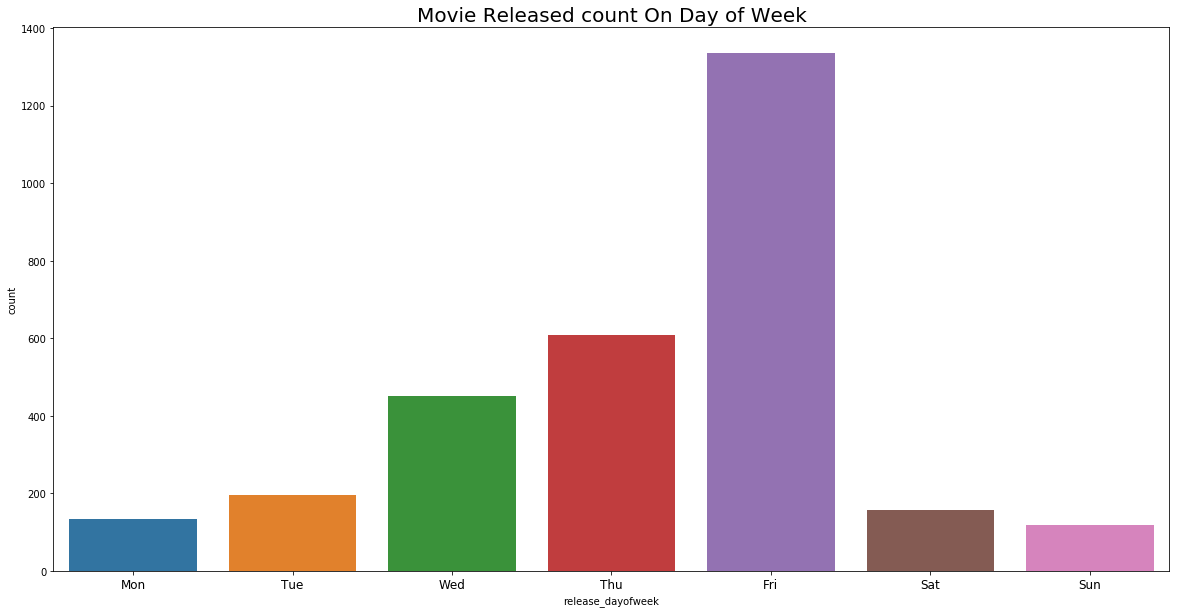

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(train.release_dayofweek.sort_values())
plt.title('Movie Released count On Day of Week',fontsize=20)
loc,labels=plt.xticks()
loc,labels=loc,['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.xticks(loc,labels,fontsize=12)
plt.show()

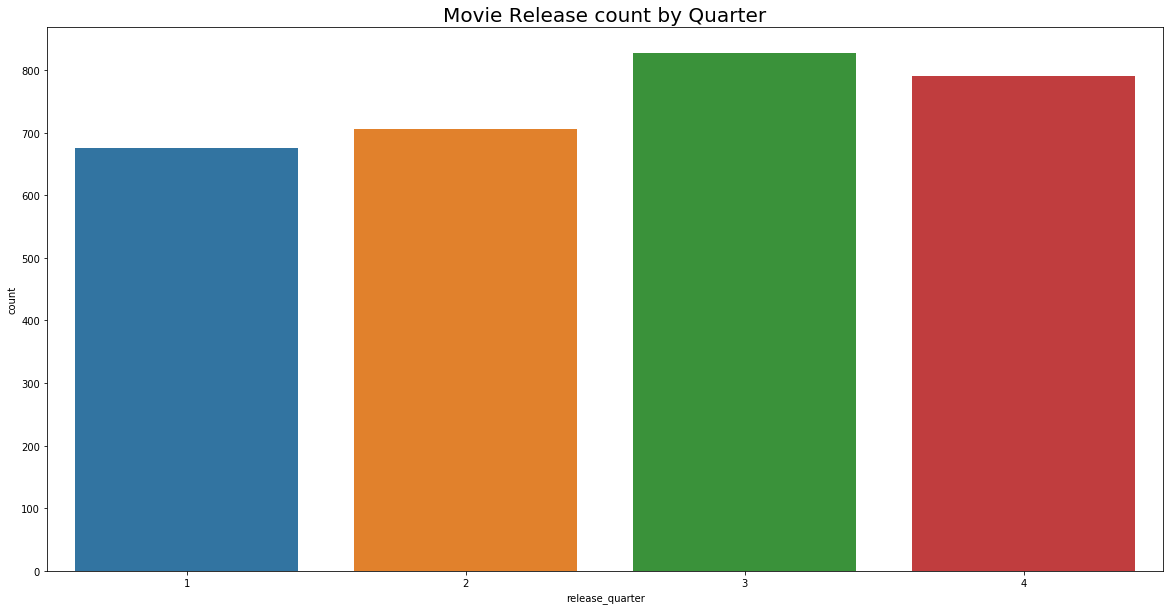

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(train.release_quarter.sort_values())
plt.title('Movie Release count by Quarter',fontsize=20)
plt.show()

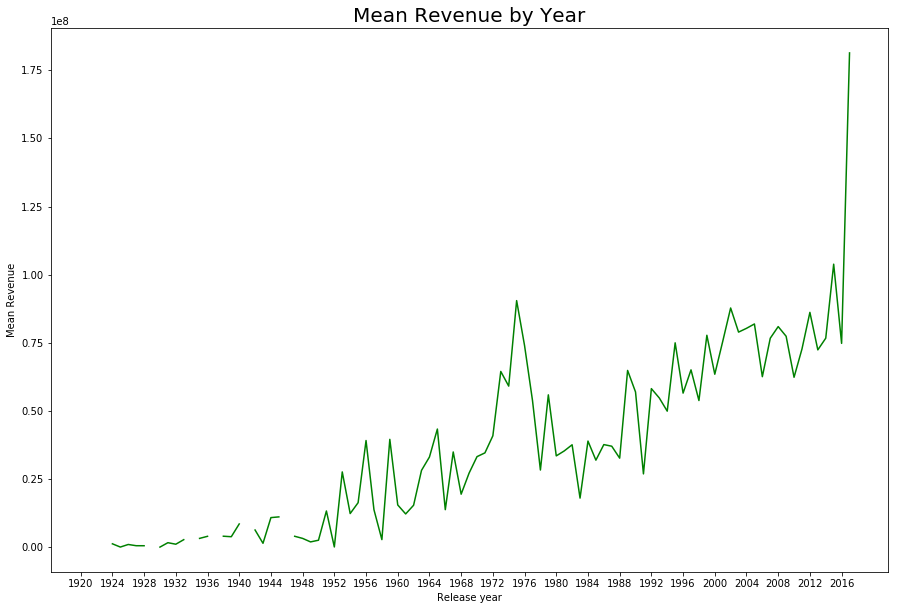

In [18]:
train['meanRevenueByYear']=train.groupby('release_year')['revenue'].aggregate('mean')
train['meanRevenueByYear'].plot(figsize=(15,10),color='g')
plt.xticks(np.arange(1920,2018,4))
plt.xlabel('Release year')
plt.ylabel('Mean Revenue')
plt.title('Mean Revenue by Year',fontsize=20)
plt.show()

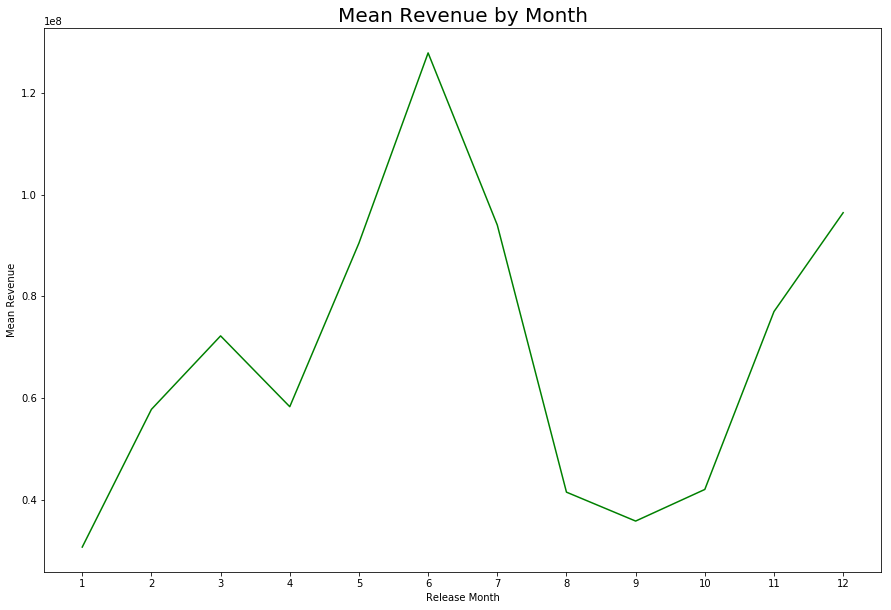

In [19]:
train['meanRevenueByMonth']=train.groupby('release_month')['revenue'].aggregate('mean')
train['meanRevenueByMonth'].plot(figsize=(15,10),color='g')
plt.xticks(np.arange(1,13))
plt.xlabel('Release Month')
plt.ylabel('Mean Revenue')
plt.title('Mean Revenue by Month',fontsize=20)
plt.show()

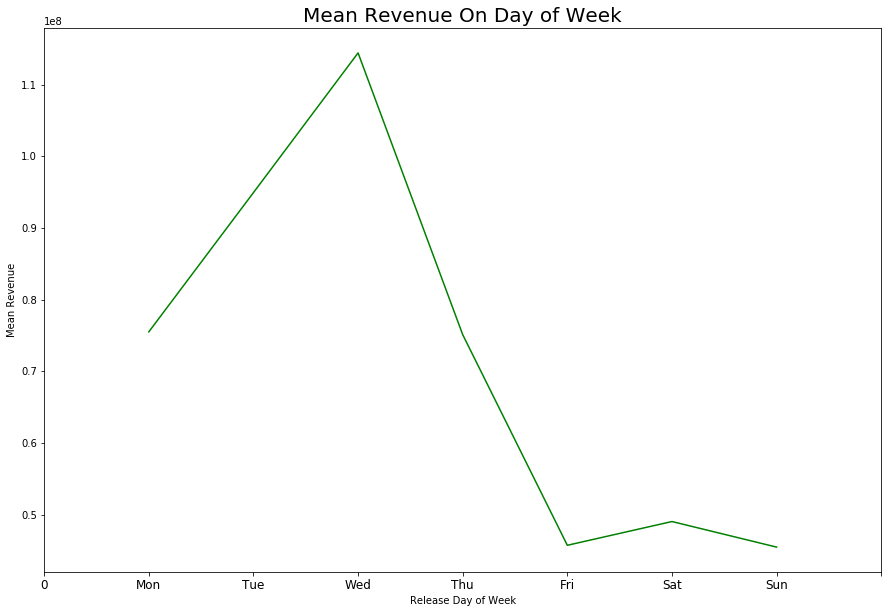

In [20]:
train['meanRevenueOnDayofWeek']=train.groupby('release_dayofweek')['revenue'].aggregate('mean')
train['meanRevenueOnDayofWeek'].plot(figsize=(15,10),color='g')
loc,labels=plt.xticks()
loc,labels=loc,['0','Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.xticks(loc,labels,fontsize=12)
plt.xlabel('Release Day of Week')
plt.ylabel('Mean Revenue')
plt.title('Mean Revenue On Day of Week',fontsize=20)
plt.show()

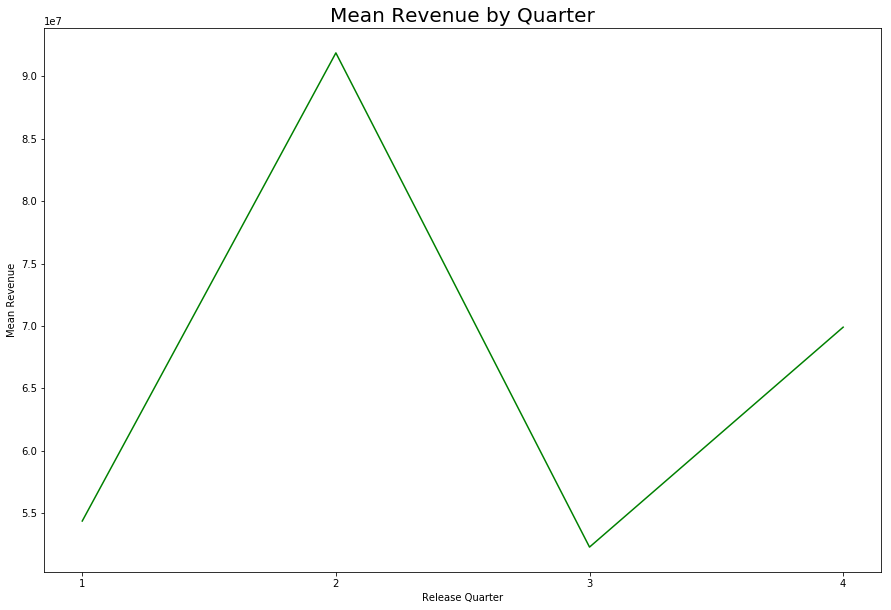

In [21]:
train['meanRevenueByQuarter']=train.groupby('release_quarter')['revenue'].aggregate('mean')
train['meanRevenueByQuarter'].plot(figsize=(15,10),color='g')
plt.xticks(np.arange(1,5))
plt.xlabel('Release Quarter')
plt.ylabel('Mean Revenue')
plt.title('Mean Revenue by Quarter',fontsize=20)
plt.show()

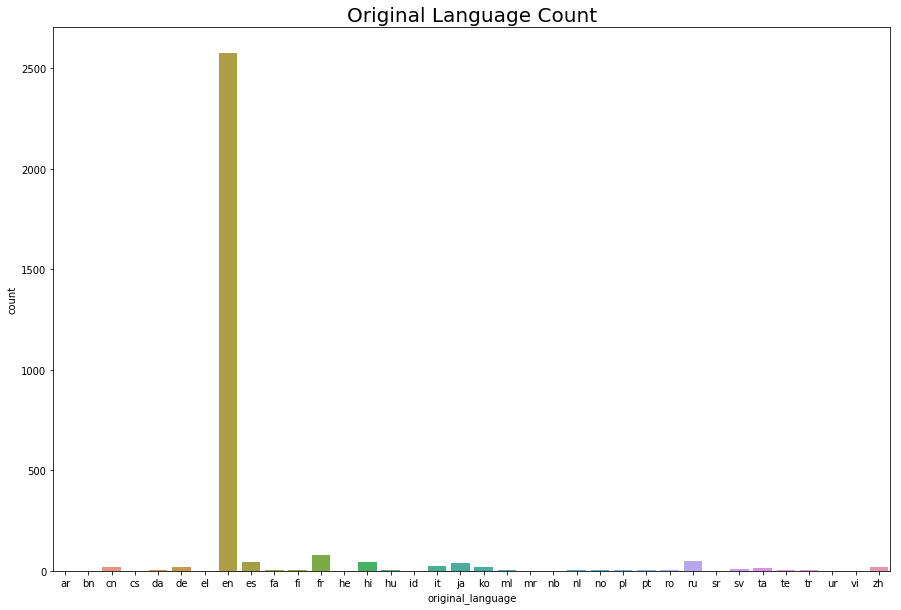

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(train.original_language.sort_values())
plt.title('Original Language Count',fontsize=20)
plt.show()

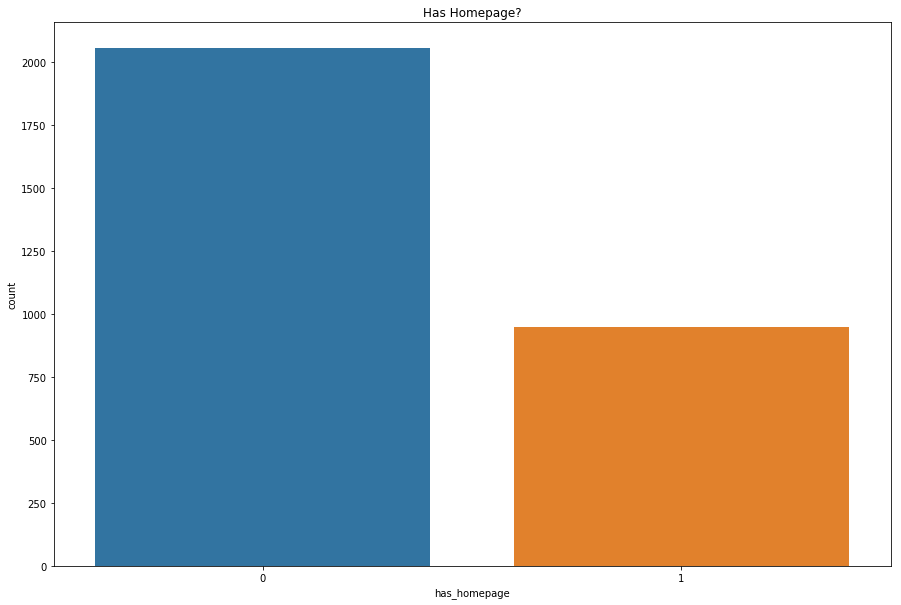

In [23]:
plt.figure(figsize=(15,10))
train['has_homepage']=1
train.loc[pd.isnull(train['homepage']),'has_homepage']=0
sns.countplot(train.has_homepage.sort_values())
plt.title('Has Homepage?')
plt.show()

<Figure size 1080x720 with 0 Axes>

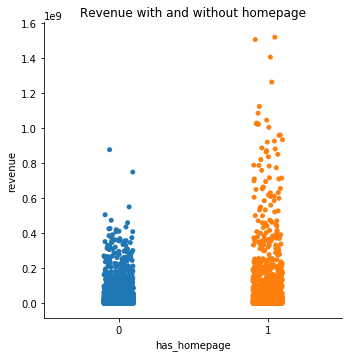

In [24]:
plt.figure(figsize=(15,10))
sns.catplot(x='has_homepage',y='revenue',data=train)
plt.title('Revenue with and without homepage')
plt.show()

<Figure size 1080x720 with 0 Axes>

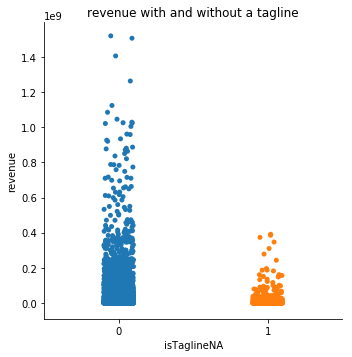

In [25]:
train['isTaglineNA']=0
train.loc[pd.isnull(train.tagline),'isTaglineNA']=1
plt.figure(figsize=(15,10))
sns.catplot(x='isTaglineNA',y='revenue',data=train)
plt.title('revenue with and without a tagline')
plt.show()

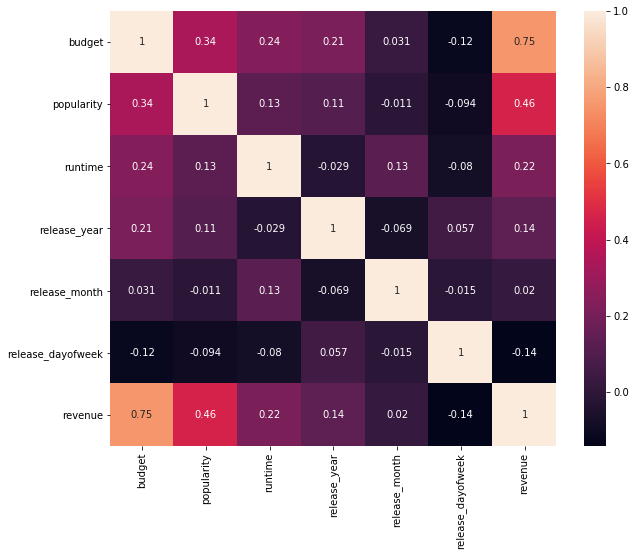

In [26]:
train = train[['budget','popularity','runtime','release_year','release_month','release_dayofweek','revenue']]
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True)
plt.show()

### Feature Engineering### 

In [27]:
# import train and test datasets
train=pd.read_csv('train.csv')
train=reduceMem(train)
test=pd.read_csv('test.csv')
test=reduceMem(test)

Memory usage of dataframe is 0.53 MB --> 0.46 MB (Decreased by 12.0%)
Memory usage of dataframe is 0.74 MB --> 0.66 MB (Decreased by 10.2%)


In [28]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299988,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [29]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [30]:
# Checking for missing values
def find_missing(train,test):
    count_missing_train=train.isnull().sum().values
    count_missing_test=test.isnull().sum().values
    total_train=train.shape[0]
    total_test=test.shape[0]
    ratio_missing_train=count_missing_train/total_train*100
    ratio_missing_test=count_missing_test/total_test*100
    return pd.DataFrame({'Missing_train':count_missing_train,'Missing_Ratio_train':ratio_missing_train,
                        'Missing_test':count_missing_test,'Missing_Ratio_test':ratio_missing_test},
                       index=train.columns)
df_missing=find_missing(train.drop(columns='revenue',axis=1),test)
df_missing=df_missing[df_missing['Missing_Ratio_train']>0].sort_values(by='Missing_Ratio_train',ascending=False)

In [31]:
df_missing.head()

,Missing_train,Missing_Ratio_train,Missing_test,Missing_Ratio_test
belongs_to_collection,2396,79.866667,3521,80.059118
homepage,2054,68.466667,2978,67.712597
tagline,597,19.900000,863,19.622556
Keywords,276,9.200000,393,8.935880
production_companies,156,5.200000,258,5.866303


In [32]:
from sklearn.metrics import r2_score,mean_squared_error
# Print R2 and RMSE scores
def get_score(prediction,labels):
    print('R2:{}'.format(r2_score(prediction,labels)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(prediction,labels))))

# Shows scores of training and validation sets
def train_test(estimator,x_train,x_test,y_train,y_test):
    prediction_train=estimator.predict(x_train)
    print(estimator)
    get_score(prediction_train,y_train)
    prediction_test=estimator.predict(x_test)
    print("TEST")
    get_score(prediction_test,y_test)

In [33]:
# Combine train and test datasets.
features=pd.concat([train.drop(columns='revenue'),test],keys=['Train','Test'])

In [34]:
features.head()

id                              belongs_to_collection    budget  \
Train 0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
      1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
      2   3                                                NaN   3300000   
      3   4                                                NaN   1200000   
      4   5                                                NaN         0   

                                                    genres  \
Train 0                     [{'id': 35, 'name': 'Comedy'}]   
      1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
      2                      [{'id': 18, 'name': 'Drama'}]   
      3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
      4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                                  homepage    imdb_id original_language  \
Train 0                                NaN  tt2637294                en   
      1                                NaN  tt0368933                en   
      2  http://sonyclassics.com/whiplash/  tt2582802                en   
      3         http://kahaanithefilm.com/  tt1821480                hi   
      4                                NaN  tt1380152                ko   

                                   original_title  \
Train 0                    Hot Tub Time Machine 2   
      1  The Princess Diaries 2: Royal Engagement   
      2                                  Whiplash   
      3                                   Kahaani   
      4                                      마린보이   

                                                  overview  popularity  \
Train 0  When Lou, who has become the "father of the In...    6.575393   
      1  Mia Thermopolis is now a college graduate and ...    8.248895   
      2  Under the direction of a ruthless instructor, ...   64.299988   
      3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936   
      4  Marine Boy is the story of a former national s...    1.148070   

                               ...                          \
Train 0                        ...                           
      1                        ...                           
      2                        ...                           
      3                        ...                           
      4                        ...                           

                                      production_countries release_date  \
Train 0  [{'iso_3166_1': 'US', 'name': 'United States o...      2/20/15   
      1  [{'iso_3166_1': 'US', 'name': 'United States o...       8/6/04   
      2  [{'iso_3166_1': 'US', 'name': 'United States o...     10/10/14   
      3            [{'iso_3166_1': 'IN', 'name': 'India'}]       3/9/12   
      4      [{'iso_3166_1': 'KR', 'name': 'South Korea'}]       2/5/09   

        runtime                                   spoken_languages    status  \
Train 0    93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
      1   113.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
      2   105.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
      3   122.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
      4   118.0           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]  Released   

                                                   tagline  \
Train 0  The Laws of Space and Time are About to be Vio...   
      1  It can take a lifetime to find true love; she'...   
      2    The road to greatness can take you to the edge.   
      3                                                NaN   
      4                                                NaN   

                                            title  \
Train 0                    Hot Tub Time Machine 2   
      1  The Princess Diaries 2: Royal Engagement   
      2                                  Whiplash   
      3                                   Kahaani   
      4              

In [35]:
features.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew'],
      dtype='object')

In [36]:
features['production_companies'][0]

"[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]"

In [37]:
features['production_countries'][0]

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [38]:
features['spoken_languages'][0]

"[{'iso_639_1': 'en', 'name': 'English'}]"

In [39]:
features['Keywords'][0]

"[{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]"

In [40]:
# Extract information from belongs_to_collection column which only needs to get the name
import ast
features.belongs_to_collection=features.belongs_to_collection.fillna('[{}]')
belongs_to_collectionList=[]
for i,x in features.belongs_to_collection.iteritems():
    belongs_to_collectionStr=''
    listofDict=ast.literal_eval(x)
    
    for dic in listofDict:
        if ('name' in dic.keys()):
            belongs_to_collectionStr=belongs_to_collectionStr+';'+dic['name']
    belongs_to_collectionStr=belongs_to_collectionStr.strip(';')
    belongs_to_collectionList.append(belongs_to_collectionStr)
tempDF=pd.DataFrame(belongs_to_collectionList,columns=['belongs_to_collection'])
features.index=tempDF.index
features.belongs_to_collection=tempDF.belongs_to_collection

In [41]:
features.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,1,Hot Tub Time Machine Collection,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,2,The Princess Diaries Collection,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,3,,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299988,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,4,,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,5,,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de..."


In [42]:
# Extract information from genres column
features.genres=features.genres.fillna('[{}]')
genresList=[]
for i,x in features.genres.iteritems():
    genresStr=''
    listofDict=ast.literal_eval(x)
    
    for dic in listofDict:
        if 'name' in dic.keys():
            genresStr=genresStr+';'+dic['name']
    genresStr=genresStr.strip(';')
    genresList.append(genresStr)
tempDF=pd.DataFrame(genresList,columns=['genres'])
features.index=tempDF.index
features.genres=tempDF.genres

In [43]:
features.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,1,Hot Tub Time Machine Collection,14000000,Comedy,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,2,The Princess Diaries Collection,40000000,Comedy;Drama;Family;Romance,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,3,,3300000,Drama,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299988,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,4,,1200000,Thriller;Drama,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,5,,0,Action;Thriller,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de..."


In [44]:
# Extract information from production_companies column
features.production_companies=features.production_companies.fillna('[{}]')
production_companiesList=[]
for i,x in features.production_companies.iteritems():
    production_companiesStr=''
    listofDict=ast.literal_eval(x)
    
    for dic in listofDict:
        if 'name' in dic.keys():
            production_companiesStr=production_companiesStr+';'+dic['name']
    production_companiesStr=production_companiesStr.strip(';')
    production_companiesList.append(production_companiesStr)
tempDF=pd.DataFrame(production_companiesList,columns=['production_companies'])
features.index=tempDF.index
features.production_companies=tempDF.production_companies

In [45]:
features.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,1,Hot Tub Time Machine Collection,14000000,Comedy,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,2,The Princess Diaries Collection,40000000,Comedy;Drama;Family;Romance,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,3,,3300000,Drama,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299988,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,4,,1200000,Thriller;Drama,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,5,,0,Action;Thriller,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de..."


In [46]:
# Extract information from production_contries column
features.production_countries=features.production_countries.fillna('[{}]')
production_countriesList=[]
for i,x in features.production_countries.iteritems():
    production_countriesStr=''
    listofDict=ast.literal_eval(x)
    
    for dic in listofDict:
        if 'name' in dic.keys():
            production_countriesStr=production_countriesStr+';'+dic['name']
    production_countriesStr=production_countriesStr.strip(';')
    production_countriesList.append(production_countriesStr)
tempDF=pd.DataFrame(production_countriesList,columns=['production_countries'])
features.index=tempDF.index
features.production_countries=tempDF.production_countries

In [47]:
features.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,1,Hot Tub Time Machine Collection,14000000,Comedy,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,United States of America,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,2,The Princess Diaries Collection,40000000,Comedy;Drama;Family;Romance,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,United States of America,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,3,,3300000,Drama,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299988,...,United States of America,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,4,,1200000,Thriller;Drama,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,India,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,5,,0,Action;Thriller,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,South Korea,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de..."


In [48]:
# Extract information from spoken_languages column
features.spoken_languages=features.spoken_languages.fillna('[{}]')
spoken_languagesList=[]
for i,x in features.spoken_languages.iteritems():
    spoken_languagesStr=''
    listofDict=ast.literal_eval(x)
    
    for dic in listofDict:
        if 'name' in dic.keys():
            spoken_languagesStr=spoken_languagesStr+';'+dic['name']
    spoken_languagesStr=spoken_languagesStr.strip(';')
    spoken_languagesList.append(spoken_languagesStr)
tempDF=pd.DataFrame(spoken_languagesList,columns=['spoken_languages'])
features.index=tempDF.index
features.spoken_languages=tempDF.spoken_languages

In [49]:
features.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,1,Hot Tub Time Machine Collection,14000000,Comedy,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,United States of America,2/20/15,93.0,English,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,2,The Princess Diaries Collection,40000000,Comedy;Drama;Family;Romance,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,United States of America,8/6/04,113.0,English,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,3,,3300000,Drama,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299988,...,United States of America,10/10/14,105.0,English,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,4,,1200000,Thriller;Drama,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,India,3/9/12,122.0,English;हिन्दी,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,5,,0,Action;Thriller,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,South Korea,2/5/09,118.0,한국어/조선말,Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de..."


In [50]:
# Extract information for Keywords column
features.Keywords=features.Keywords.fillna('[{}]')
KeywordsList=[]
for i,x in features.Keywords.iteritems():
    KeywordsStr=''
    listofDict=ast.literal_eval(x)
    
    for dic in listofDict:
        if 'name' in dic.keys():
            KeywordsStr=KeywordsStr+';'+dic['name']
    KeywordsStr=KeywordsStr.strip(';')
    KeywordsList.append(KeywordsStr)
tempDF=pd.DataFrame(KeywordsList,columns=['Keywords'])
features.index=tempDF.index
features.Keywords=tempDF.Keywords

In [51]:
features.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,1,Hot Tub Time Machine Collection,14000000,Comedy,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,United States of America,2/20/15,93.0,English,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,time travel;sequel;hot tub;duringcreditsstinger,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,2,The Princess Diaries Collection,40000000,Comedy;Drama;Family;Romance,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,United States of America,8/6/04,113.0,English,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,coronation;duty;marriage;falling in love,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,3,,3300000,Drama,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299988,...,United States of America,10/10/14,105.0,English,Released,The road to greatness can take you to the edge.,Whiplash,jazz;obsession;conservatory;music teacher;new ...,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,4,,1200000,Thriller;Drama,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,India,3/9/12,122.0,English;हिन्दी,Released,NaN,Kahaani,mystery;bollywood;police corruption;crime;indi...,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,5,,0,Action;Thriller,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,South Korea,2/5/09,118.0,한국어/조선말,Released,NaN,Marine Boy,,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de..."
